In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('spam.csv')
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
df.drop_duplicates(inplace=True)

In [4]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


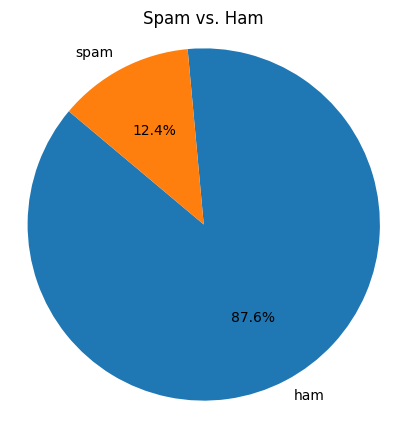

In [5]:
target_column = df['Category'].value_counts()


plt.figure(figsize=(5, 5))
plt.pie(target_column, labels=target_column.index, autopct='%1.1f%%', startangle=140)
plt.title('Spam vs. Ham')
plt.axis('Equal')
plt.show()

In [6]:
df['category'] = (df['Category']=="spam").astype(int)
df= df.drop("Category",axis=1)
df.head()

,Message,category
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [7]:
from sklearn.feature_extraction.text import CountVectorizer
msg = CountVectorizer().fit_transform(df['Message'])

In [8]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(msg, df['category'], test_size=0.20, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(4125, 8709)
(1032, 8709)
(4125,)
(1032,)


In [9]:
lrc = LogisticRegression(C=0.1, max_iter=1000)
lrc.fit(X_train, Y_train)

LogisticRegression(C=0.1, max_iter=1000)

In [10]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred_lrc = lrc.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred_lrc)
conf_matrix = confusion_matrix(Y_test, y_pred_lrc)
classification_rep = classification_report(Y_test, y_pred_lrc)


print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9767441860465116
Confusion Matrix:
[[893   3]
 [ 21 115]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       896
           1       0.97      0.85      0.91       136

    accuracy                           0.98      1032
   macro avg       0.98      0.92      0.95      1032
weighted avg       0.98      0.98      0.98      1032



<Axes: >

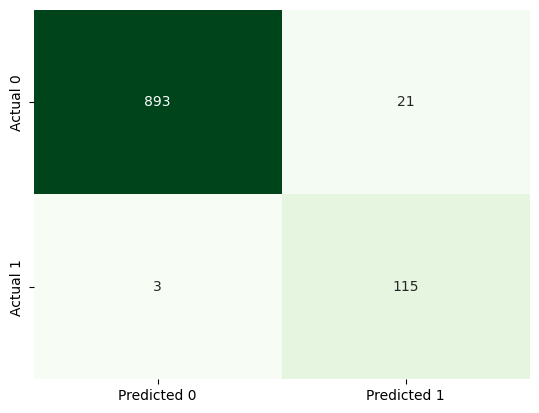

In [11]:
cm_lrc = confusion_matrix(y_pred_lrc, Y_test)

import seaborn as sns
sns.heatmap(cm_lrc, annot = True, fmt = 'd', cmap = 'Greens', cbar = False,
           xticklabels = ['Predicted 0', 'Predicted 1'],
           yticklabels = ['Actual 0', 'Actual 1'])

In [12]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)


y_pred_rfc = rfc.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred_rfc)
conf_matrix = confusion_matrix(Y_test, y_pred_rfc)
classification_rep = classification_report(Y_test, y_pred_rfc)


print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9806201550387597
Confusion Matrix:
[[895   1]
 [ 19 117]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       896
           1       0.99      0.86      0.92       136

    accuracy                           0.98      1032
   macro avg       0.99      0.93      0.96      1032
weighted avg       0.98      0.98      0.98      1032



<Axes: >

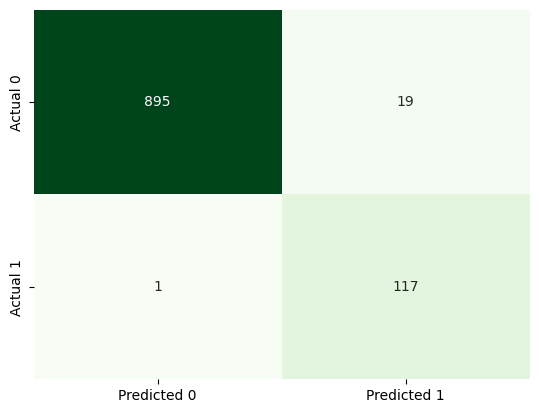

In [13]:
cm_rfc = confusion_matrix(y_pred_rfc, Y_test)
#print(cm_svm)

sns.heatmap(cm_rfc, annot = True, fmt = 'd', cmap = 'Greens', cbar = False,
           xticklabels = ['Predicted 0', 'Predicted 1'],
           yticklabels = ['Actual 0', 'Actual 1'])

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

y_pred_knn = knn.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred_knn)
conf_matrix = confusion_matrix(Y_test, y_pred_knn)
classification_rep = classification_report(Y_test, y_pred_knn)


print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9137596899224806
Confusion Matrix:
[[896   0]
 [ 89  47]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       896
           1       1.00      0.35      0.51       136

    accuracy                           0.91      1032
   macro avg       0.95      0.67      0.73      1032
weighted avg       0.92      0.91      0.89      1032



<Axes: >

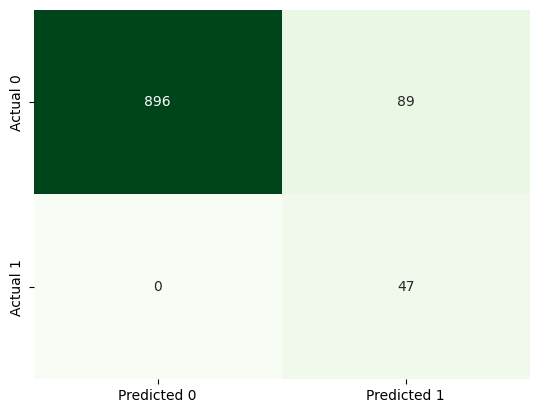

In [15]:
cm_knn = confusion_matrix(y_pred_knn, Y_test)

sns.heatmap(cm_knn, annot = True, fmt = 'd', cmap = 'Greens', cbar = False,
           xticklabels = ['Predicted 0', 'Predicted 1'],
           yticklabels = ['Actual 0', 'Actual 1'])

In [16]:
from sklearn.ensemble import AdaBoostClassifier
adab = AdaBoostClassifier()

In [17]:
adab.fit(X_train, Y_train)

y_pred_adab = adab.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred_adab)
conf_matrix = confusion_matrix(Y_test, y_pred_adab)
classification_rep = classification_report(Y_test, y_pred_adab)


print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9651162790697675
Confusion Matrix:
[[886  10]
 [ 26 110]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       896
           1       0.92      0.81      0.86       136

    accuracy                           0.97      1032
   macro avg       0.94      0.90      0.92      1032
weighted avg       0.96      0.97      0.96      1032



<Axes: >

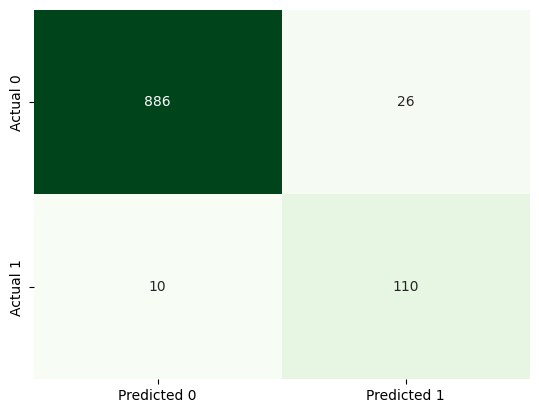

In [18]:
cm_adab = confusion_matrix(y_pred_adab, Y_test)

sns.heatmap(cm_adab, annot = True, fmt = 'd', cmap = 'Greens', cbar = False,
           xticklabels = ['Predicted 0', 'Predicted 1'],
           yticklabels = ['Actual 0', 'Actual 1'])

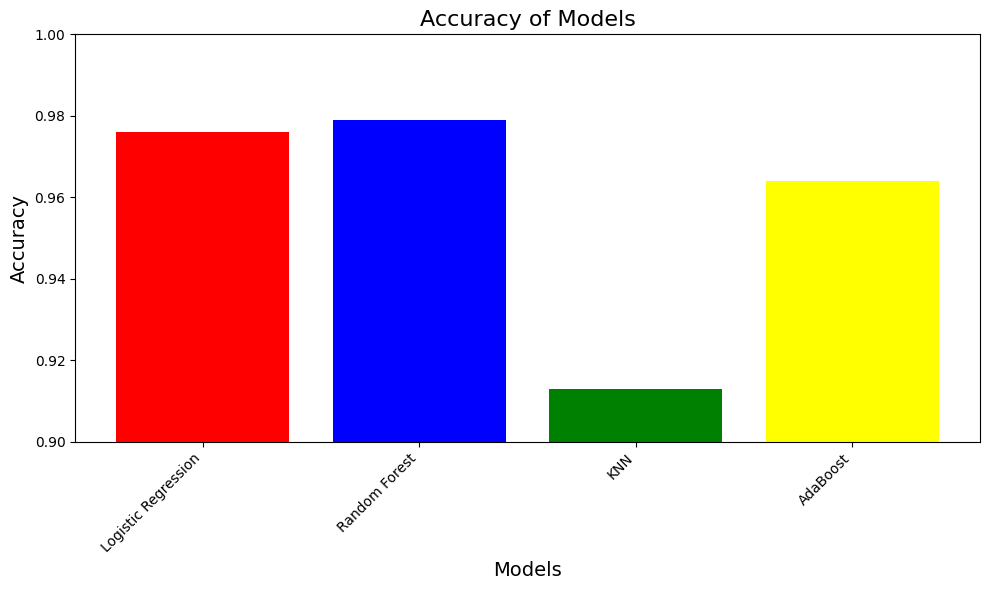

In [19]:
models = ['Logistic Regression', 'Random Forest', 'KNN', 'AdaBoost']
accuracy_scores = [0.976, 0.979, 0.913, 0.964]
plt.figure(figsize=(10, 6))
color=['red','blue','green', 'yellow']
plt.bar(models, accuracy_scores, color=color)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Accuracy of Models', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.ylim(0.9, 1)
plt.tight_layout()
plt.show()